In [101]:
import pandas as pd
import numpy as np
from IPython.display import Image
import scipy.spatial.distance as spd
from mlflow import log_metric, log_param, start_run, end_run
from tqdm import tqdm_notebook as tqdm
import json
import matplotlib.pyplot as plt
# adjust dimensions of plot area to make it look better
plt.rcParams['figure.figsize'] = (15, 7)

In [3]:
######## PART 4 ########

In [5]:
"""
Extracting mean vectors and
covariance matrix for Gaussian 1
"""
pos_class_mean1 = np.array(pd.read_csv('./hwk2_datasets/DS2_c1_m1.txt', header=None)).T.reshape(20)
neg_class_mean1 = np.array(pd.read_csv('./hwk2_datasets/DS2_c2_m1.txt', header=None)).T.reshape(20)
cov_matrix1 = np.array(pd.read_csv('./hwk2_datasets/DS2_Cov1.txt', header=None))

In [6]:
"""
Extracting mean vectors and
covariance matrix for Gaussian 2
"""
pos_class_mean2 = np.array(pd.read_csv('./hwk2_datasets/DS2_c1_m2.txt', header=None)).T.reshape(20)
neg_class_mean2 = np.array(pd.read_csv('./hwk2_datasets/DS2_c2_m2.txt', header=None)).T.reshape(20)
cov_matrix2 = np.array(pd.read_csv('./hwk2_datasets/DS2_Cov2.txt', header=None))

In [7]:
"""
Extracting mean vectors and
covariance matrix for Gaussian 3
"""
pos_class_mean3 = np.array(pd.read_csv('./hwk2_datasets/DS2_c1_m3.txt', header=None)).T.reshape(20)
neg_class_mean3 = np.array(pd.read_csv('./hwk2_datasets/DS2_c2_m3.txt', header=None)).T.reshape(20)
cov_matrix3 = np.array(pd.read_csv('./hwk2_datasets/DS2_Cov3.txt', header=None))

In [8]:
"""
generating examples from the 3
Gaussians for the two classes
"""

'\ngenerating examples from the 3\nGaussians for the two classes\n'

In [12]:
# 0.1 * 2000 = 200
pos_features1_df = pd.DataFrame(data=np.random.multivariate_normal(pos_class_mean1, cov_matrix1, size=200))
neg_features1_df = pd.DataFrame(data=np.random.multivariate_normal(neg_class_mean1, cov_matrix1, size=200))

In [13]:
# 0.42 * 2000 = 840
pos_features2_df = pd.DataFrame(data=np.random.multivariate_normal(pos_class_mean2, cov_matrix2, size=840))
neg_features2_df = pd.DataFrame(data=np.random.multivariate_normal(neg_class_mean2, cov_matrix2, size=840))

In [14]:
# 0.48 * 2000 = 960
pos_features3_df = pd.DataFrame(data=np.random.multivariate_normal(pos_class_mean3, cov_matrix3, size=960))
neg_features3_df = pd.DataFrame(data=np.random.multivariate_normal(neg_class_mean3, cov_matrix3, size=960))

In [15]:
pos_features_df = pd.concat([pos_features1_df, pos_features2_df, pos_features3_df], ignore_index=True)
neg_features_df = pd.concat([neg_features1_df, neg_features2_df, neg_features3_df], ignore_index=True)

In [21]:
"""
generating the class labels for the 2 classes
which will be added to the DataFrames made above
"""
pos_class_column = pd.Series([1 for x in range(2000)])
neg_class_column = pd.Series([0 for x in range(2000)])

In [22]:
"""
adding the columns with class labels to
the respective DataFrames for the 2 classes
"""
pos_class_df = pd.concat([pos_features_df, pos_class_column], axis=1, ignore_index=True)
neg_class_df = pd.concat([neg_features_df, neg_class_column], axis=1, ignore_index=True)

In [25]:
"""
extracting a 20% sample for the test set
from both the positive and negative classes
"""
test_df_pos_class = pos_class_df.sample(frac=0.2)
test_df_neg_class = neg_class_df.sample(frac=0.2)
test_df = pd.concat([test_df_pos_class, test_df_neg_class], ignore_index=True)
test_x = test_df.drop([20], axis=1)
test_y = test_df[20]

In [26]:
"""
for the valid set, getting those records 
from the total which are not present in 
the test set and getting a 25% sample from
that. a 25% sample from the (total-test set)
is equivalent to 20% of the total.
"""
valid_df_pos_class = pos_class_df.loc[~pos_class_df.index.isin(test_df_pos_class.index)].sample(frac=0.25)
valid_df_neg_class = neg_class_df.loc[~neg_class_df.index.isin(test_df_neg_class.index)].sample(frac=0.25)
valid_df = pd.concat([valid_df_pos_class, valid_df_neg_class], ignore_index=True)
valid_x = valid_df.drop([20], axis=1)
valid_y = valid_df[20]

In [27]:
"""
getting all records for both positive and
negative classes which are not a part of 
either the test set or valid set. combining
the resultant positive, negative class records
to obtain the training set.
"""
not_train_df_pos_class = pd.concat([test_df_pos_class, valid_df_pos_class])
train_df_pos_class = pos_class_df.loc[~pos_class_df.index.isin(not_train_df_pos_class.index)]

not_train_df_neg_class = pd.concat([test_df_neg_class, valid_df_neg_class])
train_df_neg_class = neg_class_df.loc[~neg_class_df.index.isin(not_train_df_neg_class.index)]

train_df = pd.concat([train_df_pos_class, train_df_neg_class], ignore_index=True)
train_x = train_df.drop([20], axis=1)
train_y = train_df[20]

In [28]:
"""
function to verify/check
the shapes of the DataFrames
"""
def check_shape(df, name):
    print(name, ":")
    print("Positive class:", df.loc[df[20] == 1].shape)
    print("Negative class:", df.loc[df[20] == 0].shape)
    print()

In [29]:
check_shape(test_df, "Test")
check_shape(valid_df, "Valid")
check_shape(train_df, "Train")

Test :
Positive class: (400, 21)
Negative class: (400, 21)

Valid :
Positive class: (400, 21)
Negative class: (400, 21)

Train :
Positive class: (1200, 21)
Negative class: (1200, 21)



In [30]:
"""
generating csv files for the 
3 data sets for submission
"""
train_df.to_csv("DS2_train.csv")
valid_df.to_csv("DS2_valid.csv")
test_df.to_csv("DS2_test.csv")

In [32]:
######## PART 5 ########

In [33]:
###### 5.1 ######

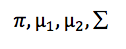

In [34]:
"""
Parameters for the GDA model
"""
Image(filename='./pics/gda_params.png')

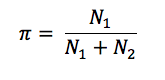

In [35]:
"""
Estimating pi
"""
Image(filename='./pics/gda_pi.png')

In [36]:
num_pos_class = train_df_pos_class.shape[0]
num_neg_class = train_df_neg_class.shape[0]
pi = num_pos_class/(num_pos_class+num_neg_class)

In [37]:
pi

0.5

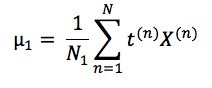

In [38]:
"""
Estimating mu_one
"""
Image(filename='./pics/gda_mu_one.png')

In [39]:
"""
since we already have the positive class
separately we don't need to go over the
combined positive and negative classes
"""
m1_data = (train_df_pos_class.drop([20], axis=1).sum(axis=0))/num_pos_class
mu_one = pd.DataFrame(data=m1_data)

In [110]:
print(np.array(mu_one))

[[0.94844936]
 [0.92708574]
 [0.90115697]
 [0.89549837]
 [0.9297854 ]
 [0.952962  ]
 [0.90585086]
 [0.89642588]
 [0.90947247]
 [0.95222619]
 [0.96383467]
 [0.85155385]
 [0.92712951]
 [0.90521228]
 [0.89599629]
 [0.90280703]
 [0.93422904]
 [0.90661406]
 [0.89351099]
 [0.93363939]]


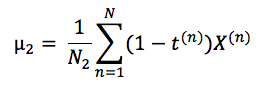

In [41]:
"""
Estimating mu_two
"""
Image(filename='./pics/gda_mu_two.png')

In [42]:
"""
once again, since we already have the negative class
separately we don't need to go over the
combined positive and negative classes
"""
m2_data = (train_df_neg_class.drop([20], axis=1).sum(axis=0))/num_neg_class
mu_two = pd.DataFrame(data=m2_data)

In [111]:
print(np.array(mu_two))

[[1.21073132]
 [1.19660852]
 [1.19285556]
 [1.18086579]
 [1.22890622]
 [1.20719877]
 [1.22589171]
 [1.18223204]
 [1.26785759]
 [1.1958518 ]
 [1.22426449]
 [1.06885167]
 [1.16232468]
 [1.19971498]
 [1.15897112]
 [1.16795356]
 [1.16626735]
 [1.1544599 ]
 [1.18383831]
 [1.26564179]]


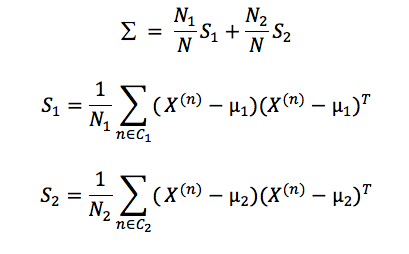

In [44]:
"""
Estimating sigma
"""
Image(filename='./pics/gda_sigma.png')

In [45]:
"""
provide the dataframe, mu vector
and number of entries to generate
the S(variance) matrix shown above in the picture
"""
def generate_variance_matrix(df, mu, num_entries):
    variance_df = pd.DataFrame(data=[[0 for i in range(20)] for j in range(20)])
    for idx, row in df.drop([20], axis=1).iterrows():
        row = pd.DataFrame(data=row)
        row.columns = [0]
        diff = row.subtract(mu)
        single_example_entry = diff.dot(diff.T)
        log_param("single_example_entry", type(single_example_entry))
        variance_df += single_example_entry
    
    variance_df = variance_df.divide(num_entries)
    return variance_df

In [46]:
s1_df = generate_variance_matrix(train_df_pos_class, mu_one, num_pos_class)
s2_df = generate_variance_matrix(train_df_neg_class, mu_two, num_neg_class)

In [49]:
s1_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,7.553054,5.137663,4.562541,4.747744,4.279574,5.352370,5.692311,5.543716,4.322371,4.988222,5.309810,4.817249,4.805897,5.872717,5.008366,5.562429,5.147914,5.183923,5.256306,5.752557
1,5.137663,6.750472,4.584078,4.876778,4.655435,5.653291,6.138194,5.122501,4.281565,4.794306,4.612393,4.699595,4.604813,5.673460,5.259441,5.630155,4.939755,4.743282,5.701438,5.425147
2,4.562541,4.584078,6.549046,4.959718,4.515445,4.679303,5.708645,4.507274,4.300587,4.603888,4.637627,4.784467,4.928053,5.737334,5.054694,4.759040,5.082430,4.429975,5.555142,5.599525
3,4.747744,4.876778,4.959718,6.198811,3.928192,5.181183,5.838967,5.166396,4.359977,5.055869,4.586497,4.500089,4.637068,5.149805,4.895959,5.051194,4.734055,4.793123,5.391412,5.425562
4,4.279574,4.655435,4.515445,3.928192,5.221914,4.315919,4.782395,4.347565,3.367728,3.888233,3.686028,3.914221,4.008987,4.544996,4.917313,4.642815,4.054910,4.285827,4.886974,4.666886
5,5.352370,5.653291,4.679303,5.181183,4.315919,7.342089,6.388200,4.994317,5.074745,5.260831,4.540335,4.731012,5.178918,6.119480,5.386294,5.592862,5.276417,4.997163,6.222586,5.914048
6,5.692311,6.138194,5.708645,5.838967,4.782395,6.388200,7.993652,5.720400,5.453025,5.758013,5.613392,5.515657,5.450448,6.616061,5.656784,6.124634,5.565906,5.374133,6.865252,6.085246
7,5.543716,5.122501,4.507274,5.166396,4.347565,4.994317,5.720400,6.366197,4.314943,4.881471,4.439223,4.562567,4.178118,5.317268,4.949924,5.152241,4.613846,5.340552,5.252197,5.308658
8,4.322371,4.281565,4.300587,4.359977,3.367728,5.074745,5.453025,4.314943,5.474003,4.261388,3.998098,4.074488,4.152872,4.722580,4.413652,4.195198,4.301269,4.243782,4.565204,4.503708
9,4.988222,4.794306,4.603888,5.055869,3.888233,5.260831,5.758013,4.881471,4.261388,6.428850,4.295691,4.387049,4.635118,5.406197,4.798164,4.936796,4.668563,4.264644,5.731006,5.087635


In [50]:
num_total_class = num_pos_class + num_neg_class
sigma = s1_df.multiply(num_pos_class/num_total_class) + s2_df.multiply(num_neg_class/num_total_class)

In [112]:
print(np.array(sigma))

[[7.79659506 5.45158783 4.86407452 5.14853926 4.45450904 5.64080325
  6.02488332 5.84341466 4.67817277 5.38628239 5.64109671 5.06558418
  5.15368334 6.30196869 5.40616626 5.71360105 5.41202652 5.45264581
  5.61510769 5.95647929]
 [5.45158783 7.16069681 4.98707912 5.29145507 4.9963418  5.92274973
  6.52982078 5.48984934 4.59892147 5.16637255 4.97923851 5.03225176
  5.0304276  6.12959113 5.67608516 5.90709916 5.2533027  5.05491567
  6.10334201 5.6937306 ]
 [4.86407452 4.98707912 6.87297828 5.38088975 4.82269186 4.98071243
  6.08653892 4.86055929 4.69719202 4.98906295 4.97053695 5.0346243
  5.24063494 6.11845375 5.42134346 5.05049386 5.35010544 4.68976202
  5.92352059 5.91929334]
 [5.14853926 5.29145507 5.38088975 6.69579518 4.28148937 5.51003998
  6.28427641 5.51438011 4.76496999 5.49458455 5.04874718 4.83654321
  5.10180807 5.61205361 5.35959843 5.41809995 5.13284668 5.17372669
  5.86390197 5.7931864 ]
 [4.45450904 4.9963418  4.82269186 4.28148937 5.58161249 4.62019542
  5.08539584 4.63

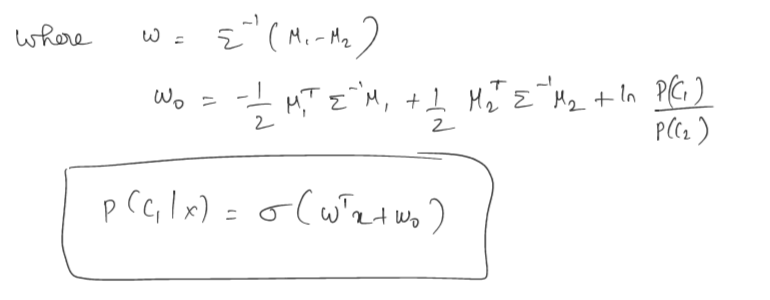

In [52]:
"""
GDA model
"""
Image(filename='./pics/gda_model.png')

In [113]:
"""
Finding w
"""
sigma_inv = pd.DataFrame(data=np.linalg.inv(sigma))
w = sigma_inv.dot(mu_one-mu_two)
print(np.array(w))

[[ 0.01647076]
 [ 0.00625306]
 [ 0.05024696]
 [-0.02180153]
 [-0.0803892 ]
 [ 0.06242152]
 [ 0.03157885]
 [ 0.00389332]
 [-0.12053348]
 [ 0.00949602]
 [-0.02166337]
 [ 0.004525  ]
 [-0.00584007]
 [-0.03725845]
 [ 0.04160025]
 [-0.0116379 ]
 [ 0.04282438]
 [ 0.02573094]
 [-0.0137741 ]
 [-0.05711191]]


In [54]:
"""
Finding w0
"""
w0_part1 = mu_one.T.dot(sigma_inv).dot(mu_one).divide(-2)
w0_part2 = mu_two.T.dot(sigma_inv).dot(mu_two).divide(2)
w0_part3 = np.log(pi/(1-pi))
w0 = w0_part1 + w0_part2 + w0_part3

In [114]:
print(np.array(w0))

[[0.08786003]]


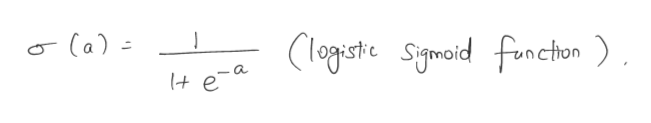

In [55]:
"""
Applying the logistic sigmoid function.
'a' = wT . x + w0 (from the picture above)
"""
Image(filename='./pics/logistic_sigmoid.png')

In [56]:
"""
Apply the logistic sigmoid function to the
input to get the prediction for the class.
"""
def get_class1_prob(w, w0, x):
    product = w.T.dot(x)
    product = product.values[0][0]
    w0 = w0[0][0]
    sigmoid_input = float(product + w0)
    denominator = 1 + np.e**(sigmoid_input*(-1))
    return 1/denominator

In [57]:
"""
Finding the predictions
for the test set
"""
five_test_predictions = []
for idx in range(test_df.shape[0]):
    x = test_df[idx:idx+1].drop([20], axis=1)
    test_pred = get_class1_prob(w, w0, x.T)
#     print(test_pred)
    if test_pred < 0.5:
        test_pred = 0
    else:
        test_pred = 1
        
    five_test_predictions.append(test_pred)

In [58]:
five_test_predictions

[0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,


In [59]:
def find_attr_confusion_matrix(dataset_predictions, dataset_y):
    confusion_dict = {"true_pos": 0, "true_neg": 0, "false_pos": 0, "false_neg": 0}
    dataset_y_list = list(dataset_y)
    for prediction, target in zip(dataset_predictions, dataset_y_list):
        if target == 1 and prediction == 1:
            confusion_dict["true_pos"] += 1
        
        elif target == 1 and prediction == 0:
            confusion_dict["false_neg"] += 1
        
        elif target == 0 and prediction == 1:
            confusion_dict["false_pos"] += 1
        
        elif target == 0 and prediction == 0:
            confusion_dict["true_neg"] += 1
    
    return confusion_dict

In [60]:
def find_accuracy(dataset_predictions, dataset_y):
    dataset_y_list = list(dataset_y)
    num_correct_classif = 0
    for prediction, target in zip(dataset_predictions, dataset_y_list):
        if prediction == target:
            num_correct_classif += 1
    
    return num_correct_classif/len(dataset_y_list)

In [61]:
def find_precision(confusion_dict):
    return confusion_dict["true_pos"]/(confusion_dict["true_pos"] + confusion_dict["false_pos"])

In [62]:
def find_recall(confusion_dict):
    return confusion_dict["true_pos"]/(confusion_dict["true_pos"] + confusion_dict["false_neg"])

In [63]:
def find_f1_measure(measure_prec, measure_recall):
    return 2*measure_prec*measure_recall/(measure_prec + measure_recall)

In [64]:
five_test_accuracy = find_accuracy(five_test_predictions, test_y)

In [65]:
five_confusion_dict = find_attr_confusion_matrix(five_test_predictions, test_y)

In [66]:
five_confusion_dict

{'false_neg': 193, 'false_pos': 209, 'true_neg': 191, 'true_pos': 207}

In [67]:
five_test_precision = find_precision(five_confusion_dict)

In [68]:
five_test_recall = find_recall(five_confusion_dict)

In [69]:
five_test_f1_measure = find_f1_measure(five_test_precision, five_test_recall)

In [73]:
###### 5.1.(a) ######

In [71]:
log_metric("5.1 Test Accuracy ", five_test_accuracy)
log_metric("5.1 Test Precision", five_test_precision)
log_metric("5.1 Test Recall", five_test_recall)
log_metric("5.1 Test F1 Measure", five_test_f1_measure)

In [72]:
print("5.1 Test Accuracy ", five_test_accuracy)
print("5.1 Test Precision", five_test_precision)
print("5.1 Test Recall", five_test_recall)
print("5.1 Test F1 Measure", five_test_f1_measure)

5.1 Test Accuracy  0.4975
5.1 Test Precision 0.49759615384615385
5.1 Test Recall 0.5175
5.1 Test F1 Measure 0.5073529411764706


In [74]:
###### 5.2 ######

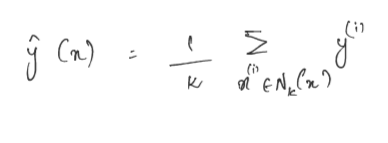

In [75]:
"""
Prediction in k-NN
"""
Image(filename='./pics/k-NN_classif.png')

In [76]:
"""
getting the sorted distances against the
training input for 1 example from the dataset
"""
def dataset_ex_sorted_distances(dataset_example, train_x):
    distances = []
#     log_param("distances", type(distances))
    for j in range(train_x.shape[0]):
        train_example = train_x[j:j+1]
        distances.append(spd.euclidean(dataset_example, train_example))

    distances_df = pd.DataFrame(data=distances)
    sorted_dist = distances_df.sort_values(by=[0])
#     log_param("sorted_dist", type(sorted_dist))
#     return sorted_dist[:num_nearest]
    return sorted_dist

In [77]:
"""
finding the average class based on the
specific example's sorted distances list
"""
def find_avg_class(train_df, sorted_dist):
    indices = list(sorted_dist.index)
#     log_param("indices", type(indices))
#     log_param("indices_value", indices)
    avg_class = 0
#     log_param("avg_class_before", type(avg_class))
    for idx in indices:
        avg_class += int(train_df[idx:idx+1][20])

    avg_class = avg_class/len(indices)
#     log_param("avg_class", type(avg_class))
    if avg_class < 0.5:
        avg_class = 0
    else:
        avg_class = 1

    return avg_class

In [78]:
"""
find the sorted distances against the
training input for EACH of the examples
from the dataset
"""
def find_dataset_distances(dataset_x, train_x):
    all_dataset_sorted_dist = []
    for i in tqdm(range(dataset_x.shape[0])):
        dataset_example = dataset_x[i:i+1]
        sorted_distances = dataset_ex_sorted_distances(dataset_example, train_x)
        all_dataset_sorted_dist.append(sorted_distances)

    # list of dataframes
    return all_dataset_sorted_dist

In [79]:
"""
finding the predictions for all examples
from the dataset for a specific value of k (k-NN)
"""
def find_dataset_predictions(all_dataset_distances, dataset_x, num_nearest_nbs):
    dataset_predictions = []
    for i in range(dataset_x.shape[0]):
        dataset_example_distances = all_dataset_distances[i]
        dataset_example_neighbors = dataset_example_distances[:num_nearest_nbs]
        neighbors_avg_class = find_avg_class(train_df, dataset_example_neighbors)
        dataset_predictions.append(neighbors_avg_class)

    return dataset_predictions

In [80]:
### TIME INTENSIVE ###
all_valid_sorted_dist = find_dataset_distances(valid_x, train_x)

In [81]:
"""
Saving all the distances
for examples in valid set
"""
all_valid_sorted_dist_df = pd.DataFrame(data=all_valid_sorted_dist)

In [82]:
all_valid_sorted_dist_df.to_csv('ds2_all_valid_sorted_dist.csv')

In [83]:
"""
creating a list which stores the
different values of k (k-NN)
"""
diff_nbs = []
nbs = 50
while nbs < len(list(train_y)): 
    diff_nbs.append(nbs)
    nbs += 200
    
"""
stores the predictions for the
valid set for each value of k
"""
valid_neighbors_predictions = {}
diff_nbs
# log_param("Different k values", diff_nbs)

[50, 250, 450, 650, 850, 1050, 1250, 1450, 1650, 1850, 2050, 2250]

In [84]:
### DON'T RUN THIS! EVEN MORE TIME INTENSIVE ###
# for num_nearest in tqdm(diff_nbs):
#     valid_predictions = find_dataset_predictions(all_valid_sorted_dist, valid_x, num_nearest)
#     valid_neighbors_predictions[num_nearest] = valid_predictions

In [86]:
# with open('DS2_valid_neighbors_predictions.json', 'w') as f:
#     json.dump(valid_neighbors_predictions, f)

In [87]:
with open('DS2_valid_neighbors_predictions.json') as json_data:
    valid_neighbors_predictions = json.load(json_data)

In [90]:
best_f1_measure = 0
best_num_nearest = 0
f1_measures = []
count = 0
for num_nearest in diff_nbs:
    confusion_dict = find_attr_confusion_matrix(valid_neighbors_predictions[str(num_nearest)], valid_y)
#     print(valid_neighbors_predictions[num_nearest])
    measure_prec = find_precision(confusion_dict)
    measure_recall = find_recall(confusion_dict)
    f1_measure = find_f1_measure(measure_prec, measure_recall)
    f1_measures.append(f1_measure)
    if f1_measure > best_f1_measure:
        best_f1_measure = f1_measure
        best_num_nearest = num_nearest

In [91]:
perf_df = pd.DataFrame({'k': diff_nbs, 'f1_measure': f1_measures})

In [92]:
perf_df

,f1_measure,k
0,0.578658,50
1,0.588997,250
2,0.602911,450
3,0.614446,650
4,0.616314,850
5,0.617676,1050
6,0.622790,1250
7,0.594421,1450
8,0.581292,1650
9,0.602105,1850


In [93]:
perf_df.to_csv('DS2_f1_measure_for_different_k.csv')

In [94]:
best_num_nearest, best_f1_measure

(2050, 0.6540198735320687)

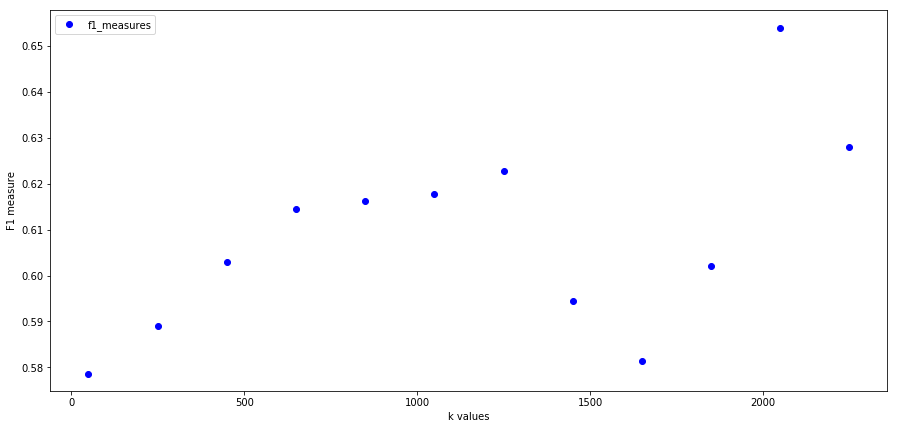

In [102]:
# plotting the output data points from the training data
# set versus the model found from the closed-form solution
plt.plot(perf_df['k'], perf_df['f1_measure'], 'bo', label='f1_measures')
# plt.plot(x_values_for_plot, find_predictions(plot_matrix, params_vector), 'r', label='Predictions')
plt.xlabel('k values')
plt.ylabel('F1 measure')
plt.legend()
plt.show()

In [103]:
###### 5.3 ######

In [104]:
all_test_sorted_dist = find_dataset_distances(test_x, train_x)
test_predictions = find_dataset_predictions(all_test_sorted_dist, test_x, best_num_nearest)
test_accuracy = find_accuracy(test_predictions, test_y)
test_confusion_dict = find_attr_confusion_matrix(test_predictions, test_y)
test_precision = find_precision(test_confusion_dict)
test_recall = find_recall(test_confusion_dict)
test_f1_measure = find_f1_measure(test_precision, test_recall)

In [105]:
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Measure:", test_f1_measure)

Test Accuracy: 0.50125
Test Precision: 0.5006993006993007
Test Recall: 0.895
Test F1 Measure: 0.6421524663677131


In [106]:
log_metric("5.3 Test Accuracy", test_accuracy)
log_metric("5.3 Test Precision", test_precision)
log_metric("5.3 Test Recall", test_recall)
log_metric("5.3 Test F1 Measure", test_f1_measure)

In [107]:
print("best_f1_measure", best_f1_measure)
print("best_num_nearest", best_num_nearest)

best_f1_measure 0.6540198735320687
best_num_nearest 2050


In [109]:
log_metric("5.3 best_f1_measure", best_f1_measure)
log_metric("5.3 best_num_nearest", best_num_nearest)